In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
"""
def generateXvector(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes variables.
    """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX
"""

In [ ]:
"""
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(len(X[0])+1, 1)
    return theta
"""

In [ ]:
 """
 #theta = np.random.randn(10+1, 1)
 #theta
 def sigmoid_function(X):
    """ Calculate the sigmoid value of the inputs
         Parameters:
          X:  values
        Return value: the sigmoid value
    """
    return 1/(1+math.e**(-X))
  """

In [ ]:
"""
def Logistics_Regression(X,y,learningrate, iterations):
    """ Find the Logistics regression model for the data set
         Parameters:
          X: independent variables matrix
          y: dependent variables matrix
          learningrate: learningrate of Gradient Descent
          iterations: the number of iterations
        Return value: the final theta vector and the plot of cost function
    """
    y_new = np.reshape(y, (len(y), 1))
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta = theta - learningrate * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
 #Calculate the loss for each training instance
        cost_lst.append(cost_value)
    plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    return theta
"""

In [26]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
headernames = ['Roll', 'Name', 'Beng', 'Eng', 'Math', 'Science', 'PEdu', 'WEdu', 'Comp', 'section']

In [27]:
df=pd.read_csv("/content/drive/MyDrive/data_5_edited.csv" , names=headernames)

df.columns = headernames
df.drop(columns=['Roll', 'Name', 'Eng', 'Science', 'PEdu' , 'WEdu', 'Comp'], inplace=True)
df.shape
df.head()

,Beng,Math,section
0,29,25,A
1,29,11,A
2,29,25,A
3,28,21,A
4,29,27,A


In [28]:
X = df.iloc[:, :-1].values
y = df.iloc[:,2].values
y = np.where(y == 'A', 1 , 0)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = None)
classifier.fit(X_train, y_train)

LogisticRegression(penalty=None, random_state=0)

In [32]:
y_pred = classifier.predict(X_test)
print(y_pred)


[1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1]


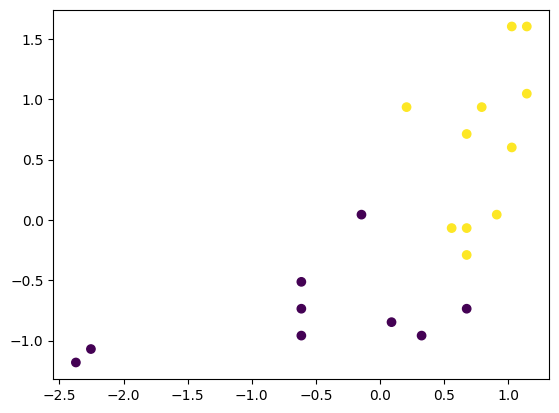

In [33]:
plt.scatter(x=X_test[:,0], y = X_test[:,1], c =y_pred)

In [34]:
result = pd.DataFrame({'Actual': y_test, 'Predict' : y_pred})
result

,Actual,Predict
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,1
9,0,0


In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9,  1],
       [ 0, 10]])

In [36]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.95
